In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
df=pd.read_csv("audi.csv")
display(df)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


In [3]:
display(df.shape)

(10668, 9)

In [4]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB
None


In [5]:
display (df.isna().sum() )

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [6]:
display (df.describe ())

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


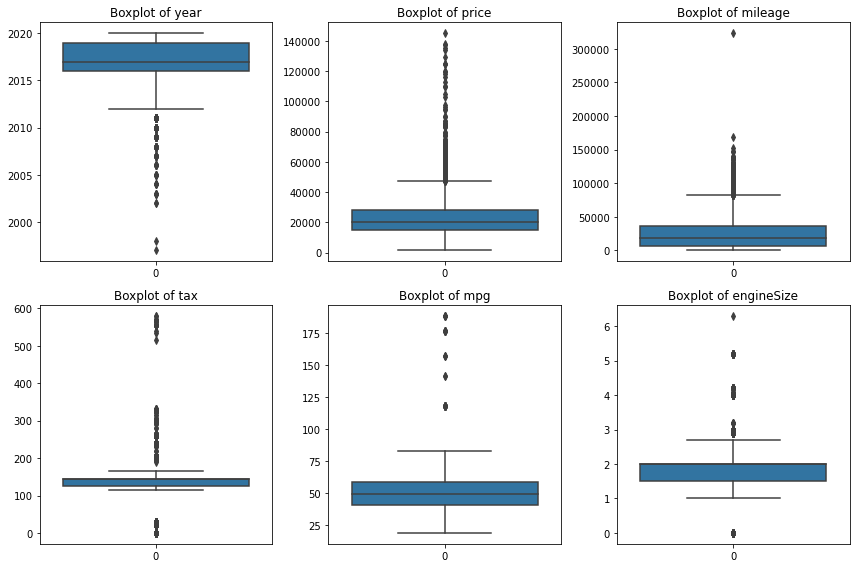

In [7]:
numerical_columns = ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']

plt.figure(figsize=(12, 8))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df[column])
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()

plt.show()

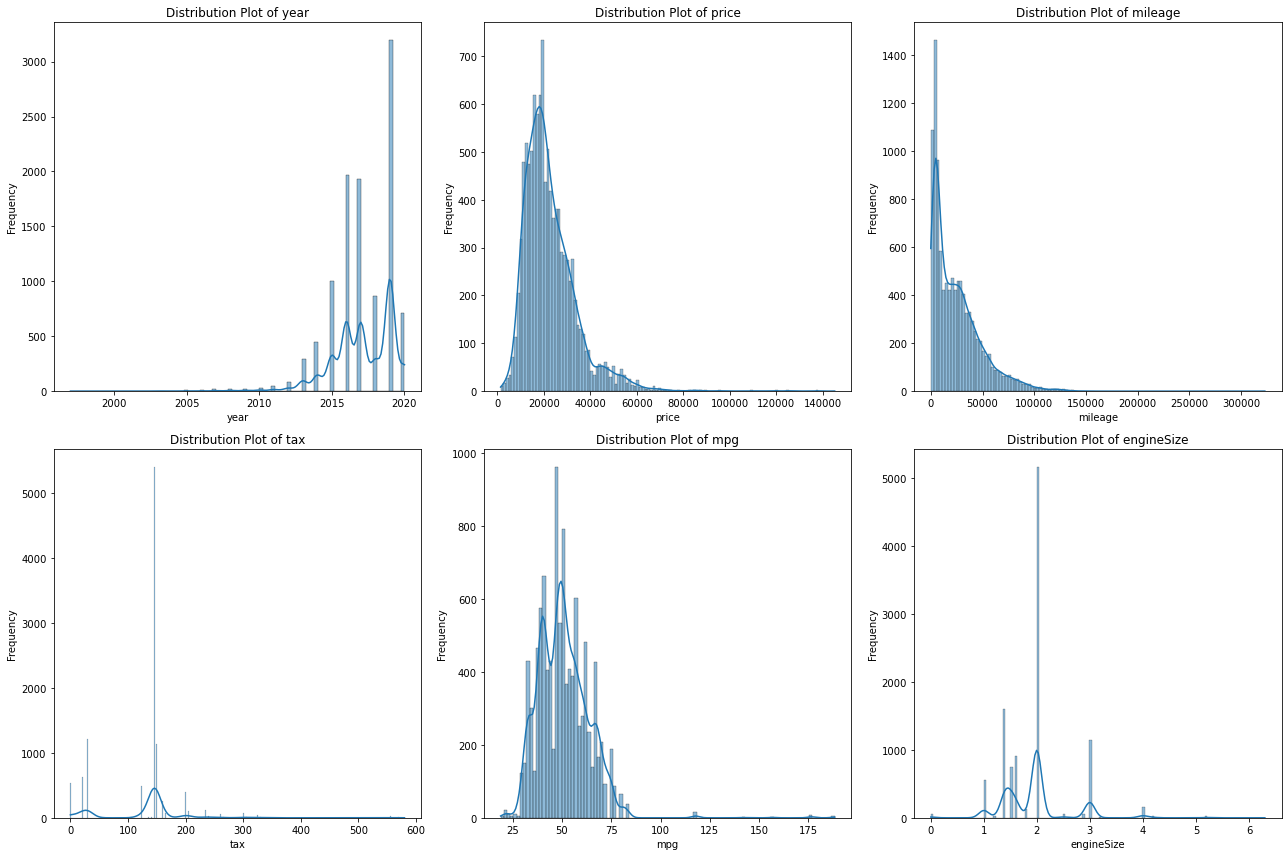

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# List of numerical columns to plot
numerical_columns = ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']

# Plotting distribution plots for each numerical column in subplots
for idx, col in enumerate(numerical_columns):
    row, col_idx = divmod(idx, 3)
    sns.histplot(df[col], kde=True, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Distribution Plot of {col}')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


In [9]:
#Outlier can't be removed directly as they are due to change in time

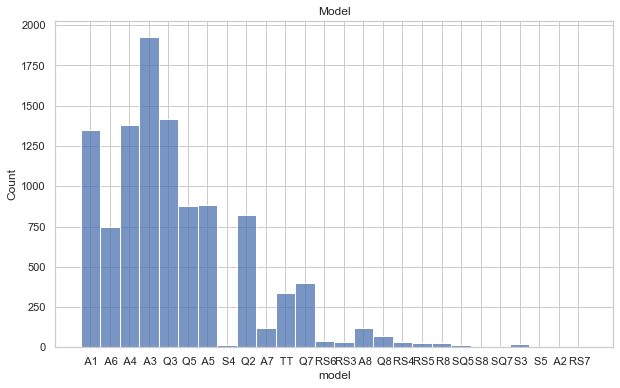

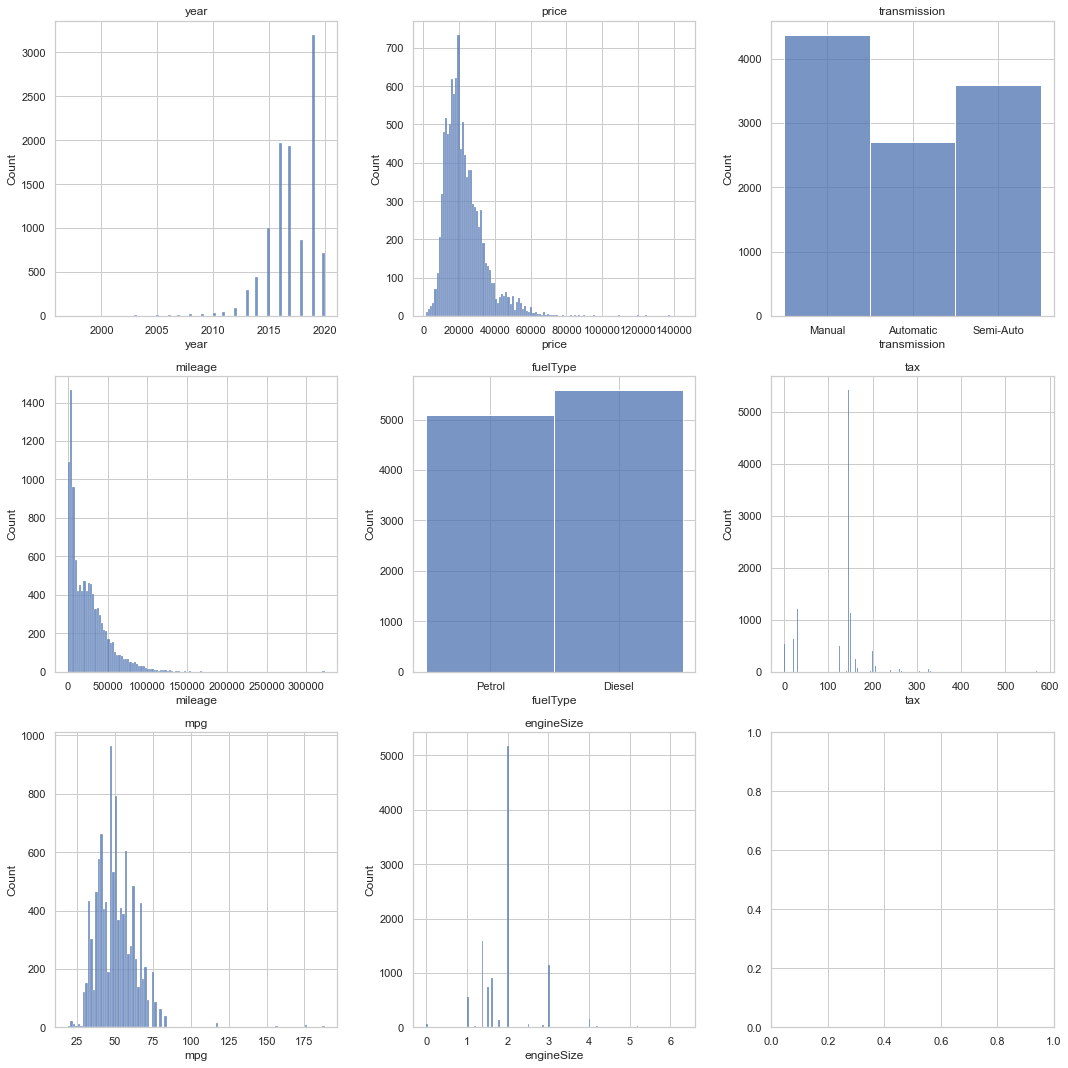

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove the "model" column from the DataFrame
df_without_model = df.drop(columns=["model"])

# Plot the "model" column separately
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="model")
plt.title("Model")
plt.show()

# Plot the other columns in a subplot grid
sns.set(style="whitegrid")
num_cols = 3
num_rows = (len(df_without_model.columns) - 1) // num_cols + 1
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

for i, col in enumerate(df_without_model.columns):
    if col != "model":
        sns.histplot(data=df, x=col, ax=axes[i // num_cols, i % num_cols])
        axes[i // num_cols, i % num_cols].set_title(col)

plt.tight_layout()
plt.show()


In [10]:
df['fuelType'] = df['fuelType'].replace('Hybrid', 'Petrol')

In [11]:
#Spliting the data
X = df.iloc[:,[0,1,3,4,5,6,7,8]].values
display (X.shape)
X

(10668, 8)

array([[' A1', 2017, 'Manual', ..., 150, 55.4, 1.4],
       [' A6', 2016, 'Automatic', ..., 20, 64.2, 2.0],
       [' A1', 2016, 'Manual', ..., 30, 55.4, 1.4],
       ...,
       [' A3', 2020, 'Manual', ..., 150, 49.6, 1.0],
       [' Q3', 2017, 'Automatic', ..., 150, 47.9, 1.4],
       [' Q3', 2016, 'Manual', ..., 150, 47.9, 1.4]], dtype=object)

In [12]:
Y = df.iloc[:,[2]].values
display (Y.shape)

(10668, 1)

In [13]:
#OneHotEncoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(drop='first'),[0,2,4])],remainder='passthrough')
X = ct.fit_transform(X)
display (X.shape)
display (pd.DataFrame(X))


(10668, 33)

,0
0,"(0, 25)\t1.0\n (0, 27)\t1.0\n (0, 28)\t201..."
1,"(0, 4)\t1.0\n (0, 28)\t2016.0\n (0, 29)\t3..."
2,"(0, 25)\t1.0\n (0, 27)\t1.0\n (0, 28)\t201..."
3,"(0, 2)\t1.0\n (0, 28)\t2017.0\n (0, 29)\t2..."
4,"(0, 1)\t1.0\n (0, 25)\t1.0\n (0, 27)\t1.0\..."
...,...
10663,"(0, 1)\t1.0\n (0, 25)\t1.0\n (0, 27)\t1.0\..."
10664,"(0, 1)\t1.0\n (0, 25)\t1.0\n (0, 27)\t1.0\..."
10665,"(0, 1)\t1.0\n (0, 25)\t1.0\n (0, 27)\t1.0\..."
10666,"(0, 8)\t1.0\n (0, 27)\t1.0\n (0, 28)\t2017..."


In [14]:
import pandas as pd

# Convert sparse matrix to dense format
X_dense = X.toarray()

# Create DataFrame from dense matrix
df_ = pd.DataFrame(X_dense)

print(df_.head())



    0    1    2    3    4    5    6    7    8    9   ...   23   24   25   26  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0  0.0   
1  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0  0.0   
3  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0  0.0   

    27      28       29     30    31   32  
0  1.0  2017.0  15735.0  150.0  55.4  1.4  
1  0.0  2016.0  36203.0   20.0  64.2  2.0  
2  1.0  2016.0  29946.0   30.0  55.4  1.4  
3  0.0  2017.0  25952.0  145.0  67.3  2.0  
4  1.0  2019.0   1998.0  145.0  49.6  1.0  

[5 rows x 33 columns]


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape)
X_test.shape

(8534, 33)


(2134, 33)

In [16]:
#Feature Selection
from sklearn.feature_selection import SelectKBest, f_regression

In [17]:
# Initialize SelectKBest with the desired number of features
feature_selection = SelectKBest(score_func=f_regression, k=20)

In [18]:
# Fit the selector to the training data and transform the features
X_train_selected = feature_selection.fit_transform(X_train, Y_train)
X_test_selected = feature_selection.transform(X_test)


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


In [19]:
#Feature Scaling
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler(with_centering=False)

In [20]:
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

In [21]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train_scaled, Y_train)
lr_pred = LR.predict(X_test_scaled)
print(lr_pred)

[[ 7522.13631306]
 [22726.26914607]
 [28156.40847319]
 ...
 [16913.12196557]
 [22871.62252559]
 [11341.75312965]]


In [22]:
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import cross_val_score
print  ('R2 Score ', r2_score(Y_test, lr_pred))
print  ('Mean Absolute Error', mean_absolute_error(Y_test,lr_pred))
cv_scores = cross_val_score(LR, X_train_scaled, Y_train, cv=5, scoring='r2')
print("Cross-Validation R2 Scores:", cv_scores)
print("Mean Cross-Validation R2 Score:", np.mean(cv_scores))

R2 Score  0.8789016487060037
Mean Absolute Error 2780.1730532815714
Cross-Validation R2 Scores: [0.85832025 0.86337982 0.87362205 0.85862242 0.87278844]
Mean Cross-Validation R2 Score: 0.8653465958571909


In [23]:
# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, lr_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 18301533.160283048


In [24]:
#RandomForest
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(X_train_scaled, Y_train)

C:\Users\prash\AppData\Local\Temp\ipykernel_20288\1160649034.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train_scaled, Y_train)


RandomForestRegressor()

In [26]:
rf_pred = RF.predict(X_test_scaled)
display (rf_pred)

array([ 9112.59, 20657.36, 29615.16, ..., 16360.2 , 20421.42, 11103.23])

In [32]:
import warnings
warnings.filterwarnings('ignore')
print  ('R2 Score ', r2_score(Y_test, rf_pred))
print  ('Mean Absolute Error', mean_absolute_error(Y_test,rf_pred))
cv_scores = cross_val_score(RF, X_train_scaled, Y_train, cv=5, scoring='r2')
print("Cross-Validation R2 Scores:", cv_scores)
print("Mean Cross-Validation R2 Score:", np.mean(cv_scores))


R2 Score  0.9638908197412861
Mean Absolute Error 1567.0713832658544
Cross-Validation R2 Scores: [0.94968031 0.95189018 0.95798911 0.95521779 0.95744802]
Mean Cross-Validation R2 Score: 0.9544450818078805


In [28]:
#SVM model
from sklearn.svm import SVR
SVM = SVR()
SVM.fit(X_train_scaled, Y_train)
svm_pred = SVM.predict(X_test_scaled)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
import warnings
warnings.filterwarnings('ignore')
print  ('R2 Score ', r2_score(Y_test, svm_pred))
print  ('Mean Absolute Error', mean_absolute_error(Y_test,svm_pred))
cv_scores = cross_val_score(SVM, X_train_scaled, Y_train, cv=5, scoring='r2')
print("Cross-Validation R2 Scores:", cv_scores)
print("Mean Cross-Validation R2 Score:", np.mean(cv_scores))

R2 Score  -0.058403878838533485
Mean Absolute Error 8398.199358708885
Cross-Validation R2 Scores: [-0.03729541 -0.08496447 -0.05301893 -0.03044759 -0.05223638]
Mean Cross-Validation R2 Score: -0.051592555314236364


In [33]:
#GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor()
gbm.fit(X_train_scaled, Y_train)
gbm_pred = gbm.predict(X_test_scaled)

In [34]:
import warnings
warnings.filterwarnings('ignore')
print  ('R2 Score ', r2_score(Y_test, gbm_pred))
print  ('Mean Absolute Error', mean_absolute_error(Y_test,gbm_pred))
cv_scores = cross_val_score(gbm, X_train_scaled, Y_train, cv=5, scoring='r2')
print("Cross-Validation R2 Scores:", cv_scores)
print("Mean Cross-Validation R2 Score:", np.mean(cv_scores))

R2 Score  0.9452743039096683
Mean Absolute Error 2036.5670921082076
Cross-Validation R2 Scores: [0.92867406 0.93809056 0.93928176 0.92931386 0.93628544]
Mean Cross-Validation R2 Score: 0.9343291377146974


In [35]:
# Bayesian Regression
from sklearn.linear_model import BayesianRidge
bayesian_model = BayesianRidge()
bayesian_model.fit(X_train_scaled.toarray(), Y_train)
bayesian_pred = bayesian_model.predict(X_test_scaled)

In [36]:
import warnings
warnings.filterwarnings('ignore')
print  ('R2 Score ', r2_score(Y_test, bayesian_pred))
print  ('Mean Absolute Error', mean_absolute_error(Y_test,bayesian_pred))
cv_scores = cross_val_score(bayesian_model, X_train_scaled, Y_train, cv=5, scoring='r2')
print("Cross-Validation R2 Scores:", cv_scores)
print("Mean Cross-Validation R2 Score:", np.mean(cv_scores))

R2 Score  0.8788949063079273
Mean Absolute Error 2780.2215780682727
Cross-Validation R2 Scores: [nan nan nan nan nan]
Mean Cross-Validation R2 Score: nan


In [ ]:
!pip install xgboost

In [37]:
#XG boost
import xgboost as xgb
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train_scaled, Y_train)
xgb_pred = xgb_model.predict(X_test_scaled)

In [38]:
import warnings
warnings.filterwarnings('ignore')
print  ('R2 Score ', r2_score(Y_test, xgb_pred))
print  ('Mean Absolute Error', mean_absolute_error(Y_test,xgb_pred))
cv_scores = cross_val_score(xgb_model, X_train_scaled, Y_train, cv=5, scoring='r2')
print("Cross-Validation R2 Scores:", cv_scores)
print("Mean Cross-Validation R2 Score:", np.mean(cv_scores))

R2 Score  0.9587127462583324
Mean Absolute Error 1618.519183915915
Cross-Validation R2 Scores: [0.95533221 0.94555874 0.96164303 0.95600647 0.95765951]
Mean Cross-Validation R2 Score: 0.9552399917497401


In [46]:
#hyperparameter tuning through RandomizedSearchCV, can be done through GridSearchCV but too slow for me
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 80, stop = 1500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(6, 45, num = 5)]
min_samples_split = [2, 20, 100]
min_samples_leaf = [1, 5, 10]


In [47]:
rand_grid={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


In [48]:
rCV=RandomizedSearchCV(estimator=RF,param_distributions=rand_grid,scoring='neg_mean_squared_error',n_iter=3,cv=3,random_state=42, n_jobs = -1)


In [50]:
display (rCV.fit(X_train_scaled,Y_train))

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=3, n_jobs=-1,
                   param_distributions={'max_depth': [6, 15, 25, 35, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [80, 237, 395, 553, 711,
                                                         868, 1026, 1184, 1342,
                                                         1500]},
                   random_state=42, scoring='neg_mean_squared_error')

In [51]:
rf_pred=rCV.predict(X_test_scaled)
display (rf_pred)


array([ 8830.55261815, 21521.6199256 , 29494.99797303, ...,
       16228.7561756 , 21097.80883929, 11008.86753968])

In [53]:
print  ('R2 Score ', r2_score(Y_test, rf_pred))
print  ('Mean Absolute Error', mean_absolute_error(Y_test,rf_pred))

R2 Score  0.964317227276414
Mean Absolute Error 1567.9372303021978


In [55]:
import pickle 
pickle.dump(rCV, open('Car_price.pkl','wb'))
 
model=pickle.load(open('Car_price.pkl','rb'))
print (model.predict (X_train_scaled))

[21260.67280754 13290.5862252  30085.94798115 ... 24856.09710363
 21234.31422348 22863.91745536]
